# 3D Ellipse to 2D Ellipse

Herein, I define any ellipse on an arbitrary orbital plane to be a 3D ellipse.
The projection of any 3D ellipse onto any plane must be another ellipse (applies generally).
The practical origin of the orbital plane is a Foci of the 3D ellipse. This (0,0,0) point is the Foci of the 3D ellipse. The 3D ellipse center (where the semi-major and semi-minor axis cross) is coincident with the center of the 3D ellipse's projection on any plane.
Finally, the ellipse center-origin (Foci)-3D ellipse perigee must necessarily lie along the same line

### Import

In [122]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.vector import *
N = ReferenceFrame('N')

### Declare Symbols

In [123]:
#All angles in radians!!!!
a, e, inc, W, w, v = sp.symbols('a e inc W w v', real=True, positive=True)
p = sp.Symbol('p', real=True,positive=True)
R = sp.Symbol('R', real=True,positive=True)
A, B = sp.symbols('A B', real=True, positive=True)
Phi = sp.Symbol('Phi',real=True,positive=True)
alpha = sp.Symbol('alpha', real=True, positive=True)

### Declare Random Constants

In [124]:
c1,c2,c3,c4,c5 = sp.symbols('c1 c2 c3 c4 c5', real=True)
x = sp.symbols('x', real=True)

#### Useful Trig Identities 1

In [125]:
sinApB = sp.sin(v)*sp.cos(w) + sp.cos(v)*sp.sin(w)#sin(v+w)
sinAmB = sp.sin(v)*sp.cos(w) - sp.cos(v)*sp.sin(w)#sin(v-w)
cosApB = sp.cos(v)*sp.cos(w) - sp.sin(v)*sp.sin(w)#cos(v+w)
cosAmB = sp.cos(v)*sp.cos(w) + sp.sin(v)*sp.sin(w)#cos(v-w)

#### Useful Trig Identities 2

In [126]:
sinv = sp.sqrt(1-sp.cos(v)**2)

The common point between a 3D ellipse and the 2D projection of this ellipse on any plane is the Ellipse Center
The orbiting Foci of the 3D ellipse projected on the 2D plane may not be the foci of 2D ellipse

### r - Equation for distance From orbiting foci

In [127]:
eqnr = a*(1-e**2)/(1+e*sp.cos(v))

In [128]:
eqnr

a*(1 - e**2)/(e*cos(v) + 1)

### XYZ of 3D ellipse

In [129]:
eqnX = eqnr*(sp.cos(W)*sp.cos((w+v)) - sp.sin(W)*sp.sin((w+v))*sp.cos(inc)).subs(W,0)
eqnY = eqnr*(sp.sin(W)*sp.cos((w+v)) + sp.cos(W)*sp.sin((w+v))*sp.cos(inc)).subs(W,0)
eqnZ = eqnr*(sp.sin(inc)*sp.sin((w+v)))

In [130]:
eqnX

a*(1 - e**2)*(-sin(W)*sin(v + w)*cos(inc) + cos(W)*cos(v + w))/(e*cos(v) + 1)

In [131]:
eqnY

a*(1 - e**2)*(sin(W)*cos(v + w) + sin(v + w)*cos(W)*cos(inc))/(e*cos(v) + 1)

In [132]:
eqnZ

a*(1 - e**2)*sin(inc)*sin(v + w)/(e*cos(v) + 1)

### Planet Star Separation - s

In [133]:
eqnS = sp.sqrt(eqnX**2 + eqnY**2)

In [134]:
sp.simplify(eqnS)

a*sqrt(4*cos(2*inc) + 4*cos(2*v + 2*w) - 2*cos(-2*inc + 2*v + 2*w) - 2*cos(2*inc + 2*v + 2*w) + 12)*Abs((e**2 - 1)/(e*cos(v) + 1))/4

#### Generic Point p on the 3D ellipse

In [135]:
p_3DEllipse = sp.Matrix([eqnX,eqnY,eqnZ])

In [136]:
#### XY of 2D ellipse in terms of KOE is eqnX and eqnY

#### The 3D vector along the semi-MAJOR axis in the direction of perigee is when v=0

In [137]:
X_perigee_vect_3D_orbit = eqnX.subs(v,0)
Y_perigee_vect_3D_orbit = eqnY.subs(v,0)
Z_perigee_vect_3D_orbit = eqnZ.subs(v,0)
majorAxisVect_3D_ellipse = sp.Matrix([X_perigee_vect_3D_orbit,Y_perigee_vect_3D_orbit,Z_perigee_vect_3D_orbit])

#### The 3D vector along the semi-MAJOR axis in the direction of apogee is when v=np.pi

In [138]:
#UNNECESSARY SINCE WE HAVE SMA and ECCEN
X_apogee_vect_3D_orbit = eqnX.subs(v,np.pi)
Y_apogee_vect_3D_orbit = eqnY.subs(v,np.pi)
p_3DEllipse_apogee = sp.Matrix([X_apogee_vect_3D_orbit,Y_apogee_vect_3D_orbit,0])

#### Unit vector from 3D Ellipse Foci to 3D Ellipse Origin

In [139]:
U_3DFoci_to_origin = -p_3DEllipse_apogee/p_3DEllipse_apogee.norm()

#### Semi-minor axis distance of 3D Ellipse

In [140]:
B_3D = a*sp.sqrt(1-e**2)

#### Distance from Foci to Origin of 3D Ellipse

In [141]:
#Distance from 3D Ellipse Foci to 3D Ellipse Origin: c**2 = a**2-b**2
C_3DFoci_to_origin = sp.sqrt(a**2-B_3D**2)

#### The 3D unit vector describing orbital plane

In [142]:
normalVect_3D_ellipse = majorAxisVect_3D_ellipse.cross(p_3DEllipse.subs(v,np.pi/2.)) #np.pi/2. was used, but any value of v is acceptable
# normalVect_3D_ellipse = sp.cross([X_perigee_vect_3D_orbit,Y_perigee_vect_3D_orbit,Z_perigee_vect_3D_orbit],\
#             [eqnX.subs(v,np.pi/2.),eqnY.subs(v,np.pi/2.),eqnZ.subs(v,np.pi/2.)]) #np.pi/2. was used, but any value of v is acceptable
normalVect_3D_ellipse = normalVect_3D_ellipse/normalVect_3D_ellipse.norm()

#### The 3D unit vector along the semi-MINOR axis is given by

In [143]:
minorAxisUnitVect_3D_ellipse = majorAxisVect_3D_ellipse.cross(normalVect_3D_ellipse)

#### The 3D vector along the semi-MINOR axis is therefore

In [144]:
minorAxisVect_3D_ellipse = B_3D*minorAxisUnitVect_3D_ellipse

The center of a 3D ellipse is the same as the center of it's projection on any plane

#### From 2D Projected Ellipse Center to Projected 3D Ellipse Foci

A (major or minor) axis of the 2D Ellipse must lie along the 2D Ellipse center-foci line

In [145]:
#The following is not true since the Foci of the 3D ellipse are likely not the Foci of the 2D projected ellipse
distance_2DFoci_to_origin = C_3DFoci_to_origin*sp.sqrt(U_3DFoci_to_origin[0]**2+U_3DFoci_to_origin[1]**2) #distance from (3D Ellipse Foci Projected onto 2D plane) to (either) Ellipse Origin

In [146]:
projected_FociToPerigee_distance = sp.sqrt(majorAxisVect_3D_ellipse[0]**2+majorAxisVect_3D_ellipse[1]**2)

## axis1 - defining a semi-(minor/major) axis depending on size 

In [147]:
axis1_projected = distance_2DFoci_to_origin+projected_FociToPerigee_distance #this is either the semi-major axis or semi-minor axis
axis1Unit_projected = sp.Matrix([X_perigee_vect_3D_orbit, Y_perigee_vect_3D_orbit, 0])#DELETE/np.linalg.norm([X_perigee_vect_3D_orbit, Y_perigee_vect_3D_orbit, 0])
axis1Unit_projected = axis1Unit_projected/axis1Unit_projected.norm()

In [148]:
axis1Unit_projected

Matrix([
[a*(1 - e**2)*(-sin(W)*sin(w)*cos(inc) + cos(W)*cos(w))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2))],
[ a*(1 - e**2)*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2))],
[                                                                                                                                                                                                                           0]])

## axis2 - defining a semi-(minor/major) axis depending on size

In [149]:
#Axis 2 unit vector
axis2Unit_projected = axis1Unit_projected.cross(sp.Matrix([0,0,1]))

In [150]:
axis2Unit_projected

Matrix([
[  a*(1 - e**2)*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2))],
[-a*(1 - e**2)*(-sin(W)*sin(w)*cos(inc) + cos(W)*cos(w))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2))],
[                                                                                                                                                                                                                            0]])

#### Ellipse origin location Relative to Foci of 3D Ellipse

In [151]:
projectedEllipseCenter = -axis1Unit_projected*distance_2DFoci_to_origin

#### X component

In [152]:
b = sp.symbols('b',real=True,positive=True)
b*axis2Unit_projected[0]-axis1Unit_projected[0]*distance_2DFoci_to_origin# = eqnX

a*b*(1 - e**2)*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2)) - a*(1 - e**2)*sqrt(-a**2*(1 - e**2) + a**2)*(-sin(W)*sin(w)*cos(inc) + cos(W)*cos(w))*sqrt(a**2*(1 - e**2)**2*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))**2/((1 - 1.0*e)**2*(a**2*Abs((e**2 - 1)*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))/(1.0*e - 1))**2 + a**2*Abs((e**2 - 1)*(sin(W)*sin(w + 3.14159265358979)*cos(inc) - cos(W)*cos(w + 3.14159265358979))/(1.0*e - 1))**2)) + a**2*(1 - e**2)**2*(-sin(W)*sin(w + 3.14159265358979)*cos(inc) + cos(W)*cos(w + 3.14159265358979))**2/((1 - 1.0*e)**2*(a**2*Abs((e**2 - 1)*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))/(1.0*e - 1))**2 + a**2*Abs((e**2 - 1)*(sin(W)*sin(w + 3.14159265358979)*cos(inc) - cos(W)*cos(w + 3.14159265358979

In [153]:
eqnX #just printing eqnX

a*(1 - e**2)*(-sin(W)*sin(v + w)*cos(inc) + cos(W)*cos(v + w))/(e*cos(v) + 1)

In [154]:
tmpeqnX = sp.expand(eqnX.subs(sp.cos(v+w),cosApB)).subs(sp.sin(v),sinv).subs(sp.cos(v),x) #expanding sin(v+w)

In [155]:
sp.expand(eqnX.subs(sp.cos(v+w),cosApB)).subs(sp.sin(v),sinv).subs(sp.cos(v),x)

-a*e**2*x*cos(W)*cos(w)/(e*x + 1) + a*e**2*sqrt(1 - x**2)*sin(w)*cos(W)/(e*x + 1) + a*e**2*sin(W)*sin(v + w)*cos(inc)/(e*x + 1) + a*x*cos(W)*cos(w)/(e*x + 1) - a*sqrt(1 - x**2)*sin(w)*cos(W)/(e*x + 1) - a*sin(W)*sin(v + w)*cos(inc)/(e*x + 1)

In [156]:
sp.expand(eqnX.subs(sp.cos(v+w),cosApB)).subs(sp.sin(v),sinv).subs(sp.cos(v),x) - c1

-a*e**2*x*cos(W)*cos(w)/(e*x + 1) + a*e**2*sqrt(1 - x**2)*sin(w)*cos(W)/(e*x + 1) + a*e**2*sin(W)*sin(v + w)*cos(inc)/(e*x + 1) + a*x*cos(W)*cos(w)/(e*x + 1) - a*sqrt(1 - x**2)*sin(w)*cos(W)/(e*x + 1) - a*sin(W)*sin(v + w)*cos(inc)/(e*x + 1) - c1

In [157]:
sp.simplify((sp.expand(eqnX.subs(sp.cos(v+w),cosApB)).subs(sp.sin(v),sinv).subs(sp.cos(v),x) - c1)*(e*x+1)/a)

-e**2*x*cos(W)*cos(w) + e**2*sqrt(1 - x**2)*sin(w)*cos(W) + e**2*sin(W)*sin(v + w)*cos(inc) + x*cos(W)*cos(w) - sqrt(1 - x**2)*sin(w)*cos(W) - sin(W)*sin(v + w)*cos(inc) - c1*e*x/a - c1/a

In [158]:
tmp = sp.simplify((sp.expand(eqnX.subs(sp.cos(v+w),cosApB)).subs(sp.sin(v),sinv).subs(sp.cos(v),x) - c1)*(e*x+1)/a)

In [159]:
B, C, D = sp.symbols('B C D', real=True)

In [160]:
outX1 = sp.solve(C+B*x+D*sp.sqrt(1-x**2),x)

In [161]:
outX1

[(-B*C + D*sqrt(B**2 - C**2 + D**2))/(B**2 + D**2),
 -(B*C + D*sqrt(B**2 - C**2 + D**2))/(B**2 + D**2)]

In [162]:
#outX0 = sp.solve(tmpeqnX-c1,x)

In [163]:
#outX0

In [164]:
eqnY

a*(1 - e**2)*(sin(W)*cos(v + w) + sin(v + w)*cos(W)*cos(inc))/(e*cos(v) + 1)

In [165]:
tmpeqnY = sp.expand(eqnY.subs(sp.sin(v+w),sinApB))

In [166]:
tmpeqnY

-a*e**2*sin(W)*cos(v + w)/(e*cos(v) + 1) - a*e**2*sin(v)*cos(W)*cos(inc)*cos(w)/(e*cos(v) + 1) - a*e**2*sin(w)*cos(W)*cos(inc)*cos(v)/(e*cos(v) + 1) + a*sin(W)*cos(v + w)/(e*cos(v) + 1) + a*sin(v)*cos(W)*cos(inc)*cos(w)/(e*cos(v) + 1) + a*sin(w)*cos(W)*cos(inc)*cos(v)/(e*cos(v) + 1)

#### Y component, solve

In [167]:
b*axis2Unit_projected[1]-axis1Unit_projected[1]*distance_2DFoci_to_origin # = eqnY

-a*b*(1 - e**2)*(-sin(W)*sin(w)*cos(inc) + cos(W)*cos(w))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2)) - a*(1 - e**2)*sqrt(-a**2*(1 - e**2) + a**2)*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))*sqrt(a**2*(1 - e**2)**2*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))**2/((1 - 1.0*e)**2*(a**2*Abs((e**2 - 1)*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))/(1.0*e - 1))**2 + a**2*Abs((e**2 - 1)*(sin(W)*sin(w + 3.14159265358979)*cos(inc) - cos(W)*cos(w + 3.14159265358979))/(1.0*e - 1))**2)) + a**2*(1 - e**2)**2*(-sin(W)*sin(w + 3.14159265358979)*cos(inc) + cos(W)*cos(w + 3.14159265358979))**2/((1 - 1.0*e)**2*(a**2*Abs((e**2 - 1)*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))/(1.0*e - 1))**2 + a**2*Abs((e**2 - 1)*(sin(W)*sin(w + 3.14159265358979)*cos(inc) - cos(W)*cos(w + 3.1415926535897

In [168]:
#sp.simplify(b*axis2Unit_projected[1]-axis1Unit_projected[1]*distance_2DFoci_to_origin - eqnY)#= 0

In [169]:
#axis2Unit_projected-axis1Unit_projected*distance_2DFoci_to_origin = [eqnX,eqnY,0]

In [170]:
#Axis 2 length
#Solve the following for axis2_projected
#axis2_projected = 
#SOLVE THIS [eqnX,eqnY,0] == projectedEllipseCenter + axis2_projected*axis2Unit_projected
#Aha! Solve for axis2_projected for only one variable! (Easy?)

In [171]:
projectedEllipseCenter

Matrix([
[-a*(1 - e**2)*sqrt(-a**2*(1 - e**2) + a**2)*(-sin(W)*sin(w)*cos(inc) + cos(W)*cos(w))*sqrt(a**2*(1 - e**2)**2*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))**2/((1 - 1.0*e)**2*(a**2*Abs((e**2 - 1)*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))/(1.0*e - 1))**2 + a**2*Abs((e**2 - 1)*(sin(W)*sin(w + 3.14159265358979)*cos(inc) - cos(W)*cos(w + 3.14159265358979))/(1.0*e - 1))**2)) + a**2*(1 - e**2)**2*(-sin(W)*sin(w + 3.14159265358979)*cos(inc) + cos(W)*cos(w + 3.14159265358979))**2/((1 - 1.0*e)**2*(a**2*Abs((e**2 - 1)*(sin(W)*cos(w + 3.14159265358979) + sin(w + 3.14159265358979)*cos(W)*cos(inc))/(1.0*e - 1))**2 + a**2*Abs((e**2 - 1)*(sin(W)*sin(w + 3.14159265358979)*cos(inc) - cos(W)*cos(w + 3.14159265358979))/(1.0*e - 1))**2)))/((e + 1)*sqrt(a**2*(e**2 - 1)**2*(sin(W)*cos(w) + sin(w)*cos(W)*cos(inc))**2/(e + 1)**2 + a**2*(e**2 - 1)**2*(sin(W)*sin(w)*cos(inc) - cos(W)*cos(w))**2/(e + 1)**2))],
[ -a*(1 - e**2)*sqrt(-a

# Proof I can Use W = 0

NOTE: For correct plotting of the following 2 plots, the X,Y,Z eqns must not substitute for Omega

In [172]:
import matplotlib.pyplot as plt

In [173]:
nus = np.linspace(start=0.,stop=2.*np.pi,num=200)
points0 = np.asarray([p_3DEllipse.subs(W,0).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,0).subs(v,nus[i]) for i in np.arange(len(nus))]) #Points for Ellipse on XY plane
Foci00 = C_3DFoci_to_origin.subs(W,0).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,0)

In [185]:
points1 = np.asarray([p_3DEllipse.subs(W,np.pi/2).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,0).subs(v,nus[i]) for i in np.arange(len(nus))]) #Inclined Ellipse

In [191]:
points2 = np.asarray([p_3DEllipse.subs(W,0).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,np.pi/3).subs(v,nus[i]) for i in np.arange(len(nus))]) #Points for Ellipse on XY plane

In [192]:
points3 = np.asarray([p_3DEllipse.subs(W,np.pi/2).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,np.pi/3).subs(v,nus[i]) for i in np.arange(len(nus))]) #Inclined Ellipse

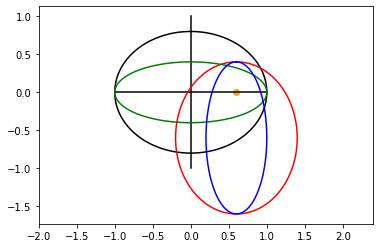

In [193]:
fig1 = plt.figure(num=7)
plt.plot(Foci00+points0[:,0],points0[:,1],color='black')#Plot ellipse fully on XY plane
plt.plot([-1.,1.],[0,0],color='black')#plot X axis
plt.plot([0,0],[-1,1],color='black')#plot Y axis
plt.scatter([Foci00],[0],color='orange')#plot Foci

#Inclined Ellipse
plt.plot(Foci00+points1[:,0],points1[:,1],color='red')

plt.plot(Foci00+points2[:,0],points2[:,1],color='green')
plt.plot(Foci00+points3[:,0],points3[:,1],color='blue')

fig1.gca().axis('equal')
plt.show(block=False)

In [195]:
nus_1 = np.linspace(start=0.,stop=2.*np.pi,num=200)
points0_1 = np.asarray([p_3DEllipse.subs(W,0).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,0).subs(v,nus_1[i]) for i in np.arange(len(nus_1))]) #Points for Ellipse on XY plane
Foci00_1 = C_3DFoci_to_origin.subs(W,0).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,0)

In [196]:
points1_1 = np.asarray([p_3DEllipse.subs(W,np.pi/2).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,0).subs(v,nus_1[i]) for i in np.arange(len(nus_1))]) #Inclined Ellipse

In [197]:
points2_1 = np.asarray([p_3DEllipse.subs(W,0).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,np.pi/3).subs(v,nus_1[i]) for i in np.arange(len(nus_1))]) #Points for Ellipse on XY plane

In [198]:
points3_1 = np.asarray([p_3DEllipse.subs(W,np.pi/2).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,np.pi/3).subs(v,nus_1[i]) for i in np.arange(len(nus_1))]) #Inclined Ellipse

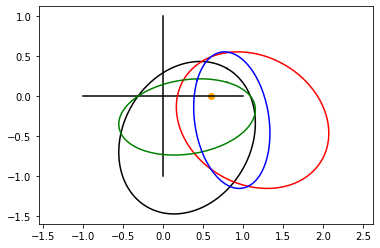

In [199]:
fig2 = plt.figure(num=8)
plt.plot(Foci00_1+points0_1[:,0],points0_1[:,1],color='black')#Plot ellipse fully on XY plane
plt.plot([-1.,1.],[0,0],color='black')#plot X axis
plt.plot([0,0],[-1,1],color='black')#plot Y axis
plt.scatter([Foci00_1],[0],color='orange')#plot Foci

#Inclined Ellipse
plt.plot(Foci00_1+points1_1[:,0],points1_1[:,1],color='red')

plt.plot(Foci00_1+points2_1[:,0],points2_1[:,1],color='green')
plt.plot(Foci00_1+points3_1[:,0],points3_1[:,1],color='blue')

fig2.gca().axis('equal')
plt.show(block=False)

# How does w change Foci plotting

In [222]:
nus_2 = np.linspace(start=0.,stop=2.*np.pi,num=200)
points0_2 = np.asarray([p_3DEllipse.subs(W,0).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,0).subs(v,nus_2[i]) for i in np.arange(len(nus_2))]) #Points for Ellipse on XY plane
Foci00_2 = C_3DFoci_to_origin.subs(W,0).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,0)

In [223]:
points1_2 = np.asarray([p_3DEllipse.subs(W,0).subs(w,0).subs(e,0.6).subs(a,1).subs(inc,np.pi/4).subs(v,nus_2[i]) for i in np.arange(len(nus_2))]) #Inclined Ellipse

In [224]:
points2_2 = np.asarray([p_3DEllipse.subs(W,0).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,0).subs(v,nus_2[i]) for i in np.arange(len(nus_2))]) #Points for Ellipse on XY plane

In [225]:
points3_2 = np.asarray([p_3DEllipse.subs(W,0).subs(w,np.pi/3).subs(e,0.6).subs(a,1).subs(inc,np.pi/4).subs(v,nus_2[i]) for i in np.arange(len(nus_2))]) #Inclined Ellipse

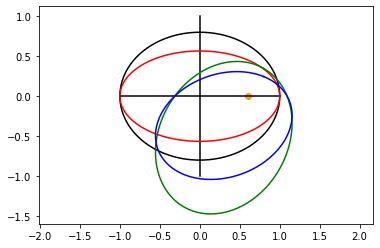

In [226]:
fig3 = plt.figure(num=8)
plt.plot(Foci00_2+points0_2[:,0],points0_2[:,1],color='black')#Plot ellipse fully on XY plane
plt.plot([-1.,1.],[0,0],color='black')#plot X axis
plt.plot([0,0],[-1,1],color='black')#plot Y axis
plt.scatter([Foci00_2],[0],color='orange')#plot Foci

#Inclined Ellipse
plt.plot(Foci00_2+points1_2[:,0],points1_2[:,1],color='red')

plt.plot(Foci00_2+points2_2[:,0],points2_2[:,1],color='green')
plt.plot(Foci00_2+points3_2[:,0],points3_2[:,1],color='blue')

fig3.gca().axis('equal')
plt.show(block=False)

# Solving Ellipse Using 5 Points with SVD

In [230]:
x, y = sp.symbols('x y', real=True)
p1, p2, p3, p4, p5 = sp.symbols('p1 p2 p3 p4 p5', real=True)
q1, q2, q3, q4, q5 = sp.symbols('q1 q2 q3 q4 q5', real=True)

In [233]:
H = sp.Matrix([[x**2, x*y, y**2, x, y, 1],[p1**2,p1*q1,q1**2,p1,q1,1],[p2**2,p2*q2,q2**2,p2,q2,1],[p3**2,p3*q3,q3**2,p3,q3,1],[p4**2,p4*q4,q4**2,p4,q4,1],[p5**2,p5*q5,q5**2,p5,q5,1]])

In [235]:
detOut = H.det()

In [236]:
#detOut2 = sp.simplify(detOut)

Group the Determinant. The coefficients of x^2, x, y^2, y, and 1 are the values for a and b

In [238]:
coeffsx = sp.Poly(detOut,x)

In [240]:
coeffsy = sp.Poly(detOut,y)

In [243]:
#detOut2

In [245]:
coeffsx.coeffs()[0]

-p1*p2*q1*q3**2*q4 + p1*p2*q1*q3**2*q5 + p1*p2*q1*q3*q4**2 - p1*p2*q1*q3*q5**2 - p1*p2*q1*q4**2*q5 + p1*p2*q1*q4*q5**2 + p1*p2*q2*q3**2*q4 - p1*p2*q2*q3**2*q5 - p1*p2*q2*q3*q4**2 + p1*p2*q2*q3*q5**2 + p1*p2*q2*q4**2*q5 - p1*p2*q2*q4*q5**2 + p1*p3*q1*q2**2*q4 - p1*p3*q1*q2**2*q5 - p1*p3*q1*q2*q4**2 + p1*p3*q1*q2*q5**2 + p1*p3*q1*q4**2*q5 - p1*p3*q1*q4*q5**2 - p1*p3*q2**2*q3*q4 + p1*p3*q2**2*q3*q5 + p1*p3*q2*q3*q4**2 - p1*p3*q2*q3*q5**2 - p1*p3*q3*q4**2*q5 + p1*p3*q3*q4*q5**2 - p1*p4*q1*q2**2*q3 + p1*p4*q1*q2**2*q5 + p1*p4*q1*q2*q3**2 - p1*p4*q1*q2*q5**2 - p1*p4*q1*q3**2*q5 + p1*p4*q1*q3*q5**2 + p1*p4*q2**2*q3*q4 - p1*p4*q2**2*q4*q5 - p1*p4*q2*q3**2*q4 + p1*p4*q2*q4*q5**2 + p1*p4*q3**2*q4*q5 - p1*p4*q3*q4*q5**2 + p1*p5*q1*q2**2*q3 - p1*p5*q1*q2**2*q4 - p1*p5*q1*q2*q3**2 + p1*p5*q1*q2*q4**2 + p1*p5*q1*q3**2*q4 - p1*p5*q1*q3*q4**2 - p1*p5*q2**2*q3*q5 + p1*p5*q2**2*q4*q5 + p1*p5*q2*q3**2*q5 - p1*p5*q2*q4**2*q5 - p1*p5*q3**2*q4*q5 + p1*p5*q3*q4**2*q5 - p2*p3*q1**2*q2*q4 + p2*p3*q1**2*q2*q5 +

In [246]:
coeffsx.coeffs()

[-p1*p2*q1*q3**2*q4 + p1*p2*q1*q3**2*q5 + p1*p2*q1*q3*q4**2 - p1*p2*q1*q3*q5**2 - p1*p2*q1*q4**2*q5 + p1*p2*q1*q4*q5**2 + p1*p2*q2*q3**2*q4 - p1*p2*q2*q3**2*q5 - p1*p2*q2*q3*q4**2 + p1*p2*q2*q3*q5**2 + p1*p2*q2*q4**2*q5 - p1*p2*q2*q4*q5**2 + p1*p3*q1*q2**2*q4 - p1*p3*q1*q2**2*q5 - p1*p3*q1*q2*q4**2 + p1*p3*q1*q2*q5**2 + p1*p3*q1*q4**2*q5 - p1*p3*q1*q4*q5**2 - p1*p3*q2**2*q3*q4 + p1*p3*q2**2*q3*q5 + p1*p3*q2*q3*q4**2 - p1*p3*q2*q3*q5**2 - p1*p3*q3*q4**2*q5 + p1*p3*q3*q4*q5**2 - p1*p4*q1*q2**2*q3 + p1*p4*q1*q2**2*q5 + p1*p4*q1*q2*q3**2 - p1*p4*q1*q2*q5**2 - p1*p4*q1*q3**2*q5 + p1*p4*q1*q3*q5**2 + p1*p4*q2**2*q3*q4 - p1*p4*q2**2*q4*q5 - p1*p4*q2*q3**2*q4 + p1*p4*q2*q4*q5**2 + p1*p4*q3**2*q4*q5 - p1*p4*q3*q4*q5**2 + p1*p5*q1*q2**2*q3 - p1*p5*q1*q2**2*q4 - p1*p5*q1*q2*q3**2 + p1*p5*q1*q2*q4**2 + p1*p5*q1*q3**2*q4 - p1*p5*q1*q3*q4**2 - p1*p5*q2**2*q3*q5 + p1*p5*q2**2*q4*q5 + p1*p5*q2*q3**2*q5 - p1*p5*q2*q4**2*q5 - p1*p5*q3**2*q4*q5 + p1*p5*q3*q4**2*q5 - p2*p3*q1**2*q2*q4 + p2*p3*q1**2*q2*q5 